In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [2]:
# Игнорирование предупреждений
import warnings

warnings.filterwarnings('ignore')

In [3]:
root_dir = os.getcwd()

dataset_dir = 'dataset'
dataset_name = 'diamonds.csv'
dataset_path = os.path.join(root_dir, dataset_dir, dataset_name)

separator = f'\n\b{"-" * 60}\n\b'

In [4]:
def load_data_csv(file_path):
    """
    Загрузка данных из CSV файла.
    :param file_path: Путь к CSV файлу.
    :return: DataFrame с загруженными данными.
    """
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        raise Exception(e)

In [5]:
df = load_data_csv(dataset_path)                # Загрузка файла в датафрейм

In [6]:
#! pip install openpyxl
# Экспорт датасета в Exel если не был создан ранее (для удобства просмотра датасета)

dataset_exel = os.path.join(root_dir, 'dataset.xlsx')
if not os.path.isfile(dataset_exel):
    df.to_excel(dataset_exel, index=False)

In [7]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
# Информация о датафрейме (датасете)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
# Столбец "Unnamed: 0" - это порядковый номер записи. Он не нужен, поэтому его удаляю.
df = df.drop(["Unnamed: 0"], axis=1)

In [10]:
# Базовые статистики
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
# В датафрейме есть нулевые значения x, y, z
# Проверю отсутствующие значения в столбцах датафрейма.
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
# Однако количество нулевых значений не отображается.

In [13]:
# Заменю нулевые значения на nan и посчитаю их количество.
df[['x','y','z']] = df[['x','y','z']].replace(0,np.nan)
df.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [14]:
# Удалю записи, в которых пропущены значения
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [16]:
# Признаки x, y, z можно заменить одним признаком - объемом: vol = x*y*z
df['vol'] = df['x']*df['y']*df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [17]:
# Удалю дубликаты записей
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53775 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float64
 5   table    53775 non-null  float64
 6   price    53775 non-null  int64  
 7   vol      53775 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.7+ MB


In [19]:
df

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


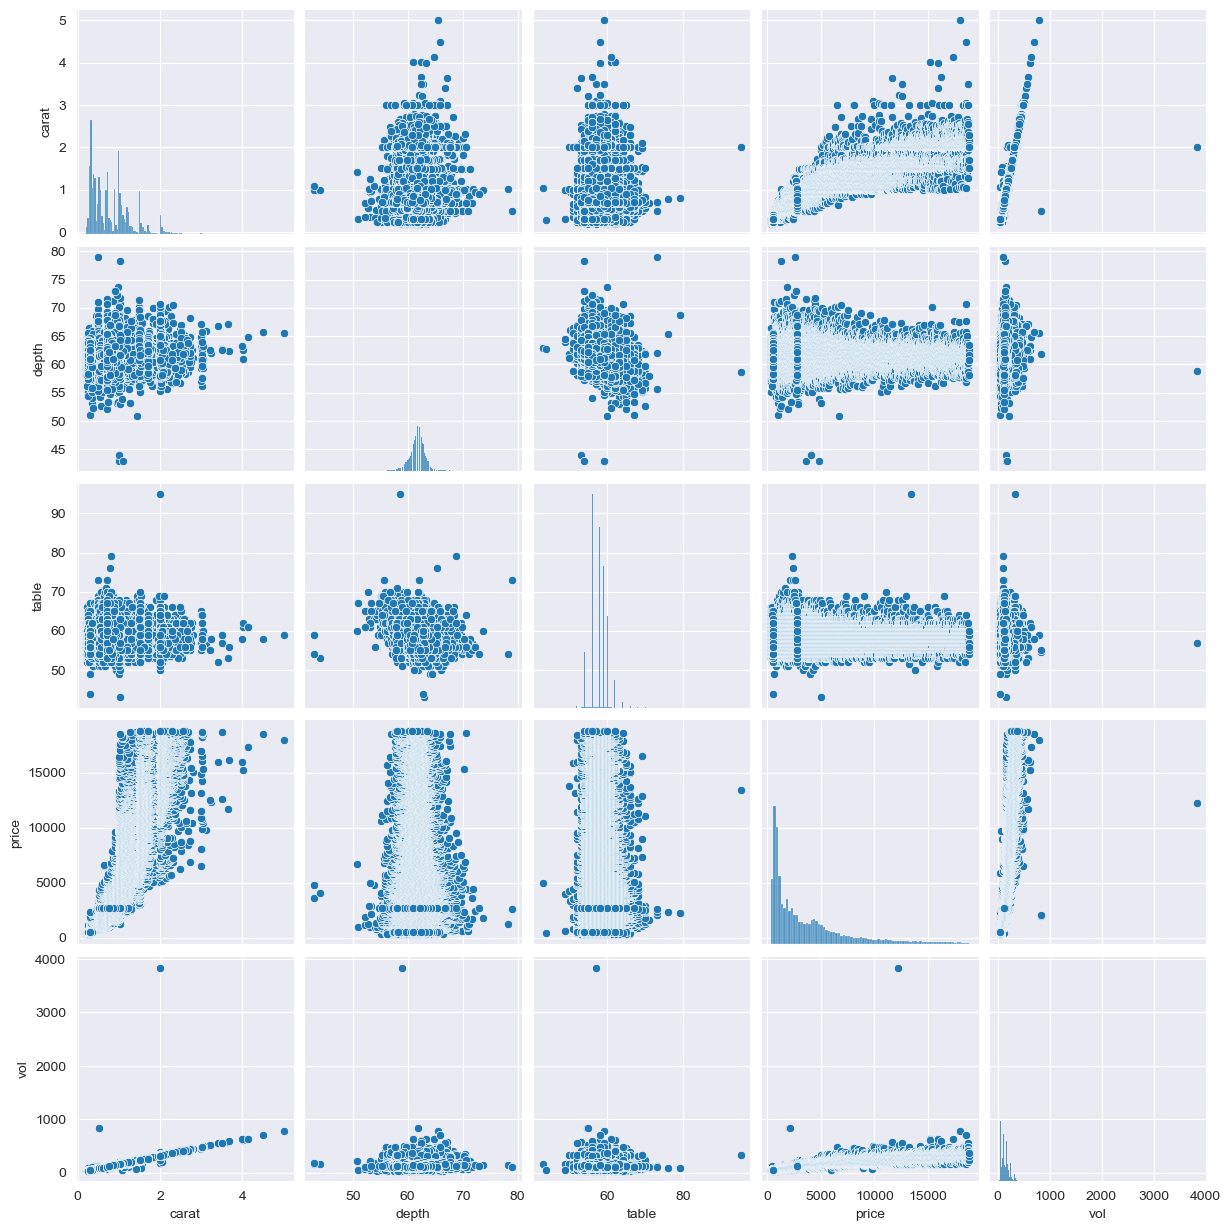

In [20]:
sns.pairplot(df)

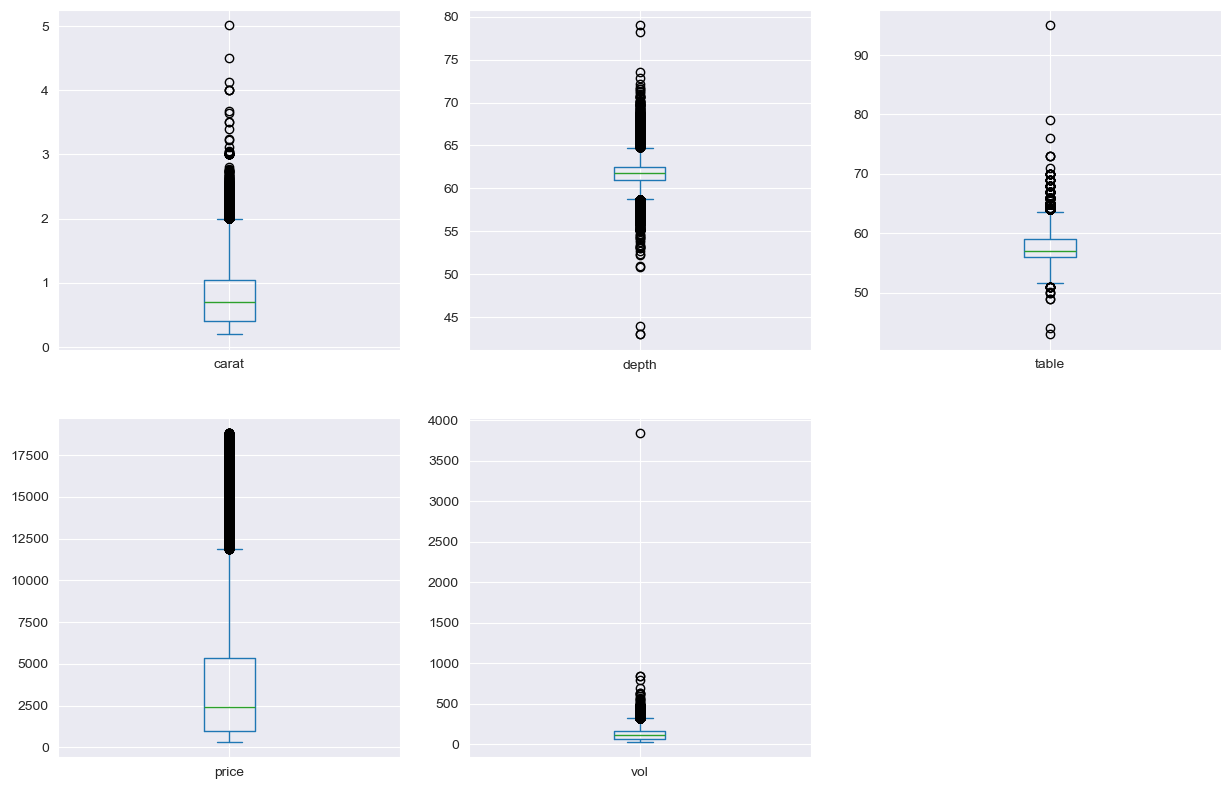

In [21]:
# На графиках присутствуют выбросы

# Также в наличие выбросов можно наглядно увидеть на визуализации ящиков с усами
df.plot(kind='box',figsize=(15,15),subplots=True,layout=(3,3))
plt.show()

In [22]:
# Необходимо удалить выбросы.
# Для этого буду использовать правило 1,5 межквартильных расстояний

In [23]:
# Функция для удаления значений, выходящих за 1,5 межквартильных расстояния

def outliers(var):
    res = []
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    lim_max = float(q3+(1.5*iqr))
    lim_min = float(q1-(1.5*iqr))

    for i in df[var]:
        if i > lim_max:
            i = np.nan
        elif i < lim_min:
            i = np.nan
        else:
            i=i
        res.append(i)
    return res

In [24]:
# Применение к каждой колонке которые не имеют тип данных object для функции удаления выбросов
for col in df.select_dtypes(exclude='object').columns:
    df[col] = outliers(col)

In [25]:
# Теперь в каждой колонке (не object) заменю удаленные значения (np.nan) на среднее значение этой колонки.

for i in df.select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(df[i].mean())

In [26]:
# Из df.info() видно, что в датасете присутствуют:
# числовые колонки ['carat', 'depth', 'table', 'price', 'volume']
# и категориальные колонки ['cut', 'color', 'clarity']

In [27]:
# Для работы с датасетом необходимо преобразовать категориальные значения в числовые
# Для преобразования буду использовать LabelEncoder()

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])

In [28]:
df

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,2,1,3,61.500000,55.000000,326.0,38.202030
1,0.21,3,1,2,59.800000,61.000000,326.0,34.505856
2,0.23,1,1,4,61.775595,57.374248,327.0,38.076885
3,0.29,3,5,5,62.400000,58.000000,334.0,46.724580
4,0.31,1,6,3,63.300000,58.000000,335.0,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.800000,57.000000,2757.0,115.920000
53936,0.72,1,0,2,63.100000,55.000000,2757.0,118.110175
53937,0.70,4,0,2,62.800000,60.000000,2757.0,114.449728
53938,0.86,3,4,3,61.000000,58.000000,2757.0,140.766120


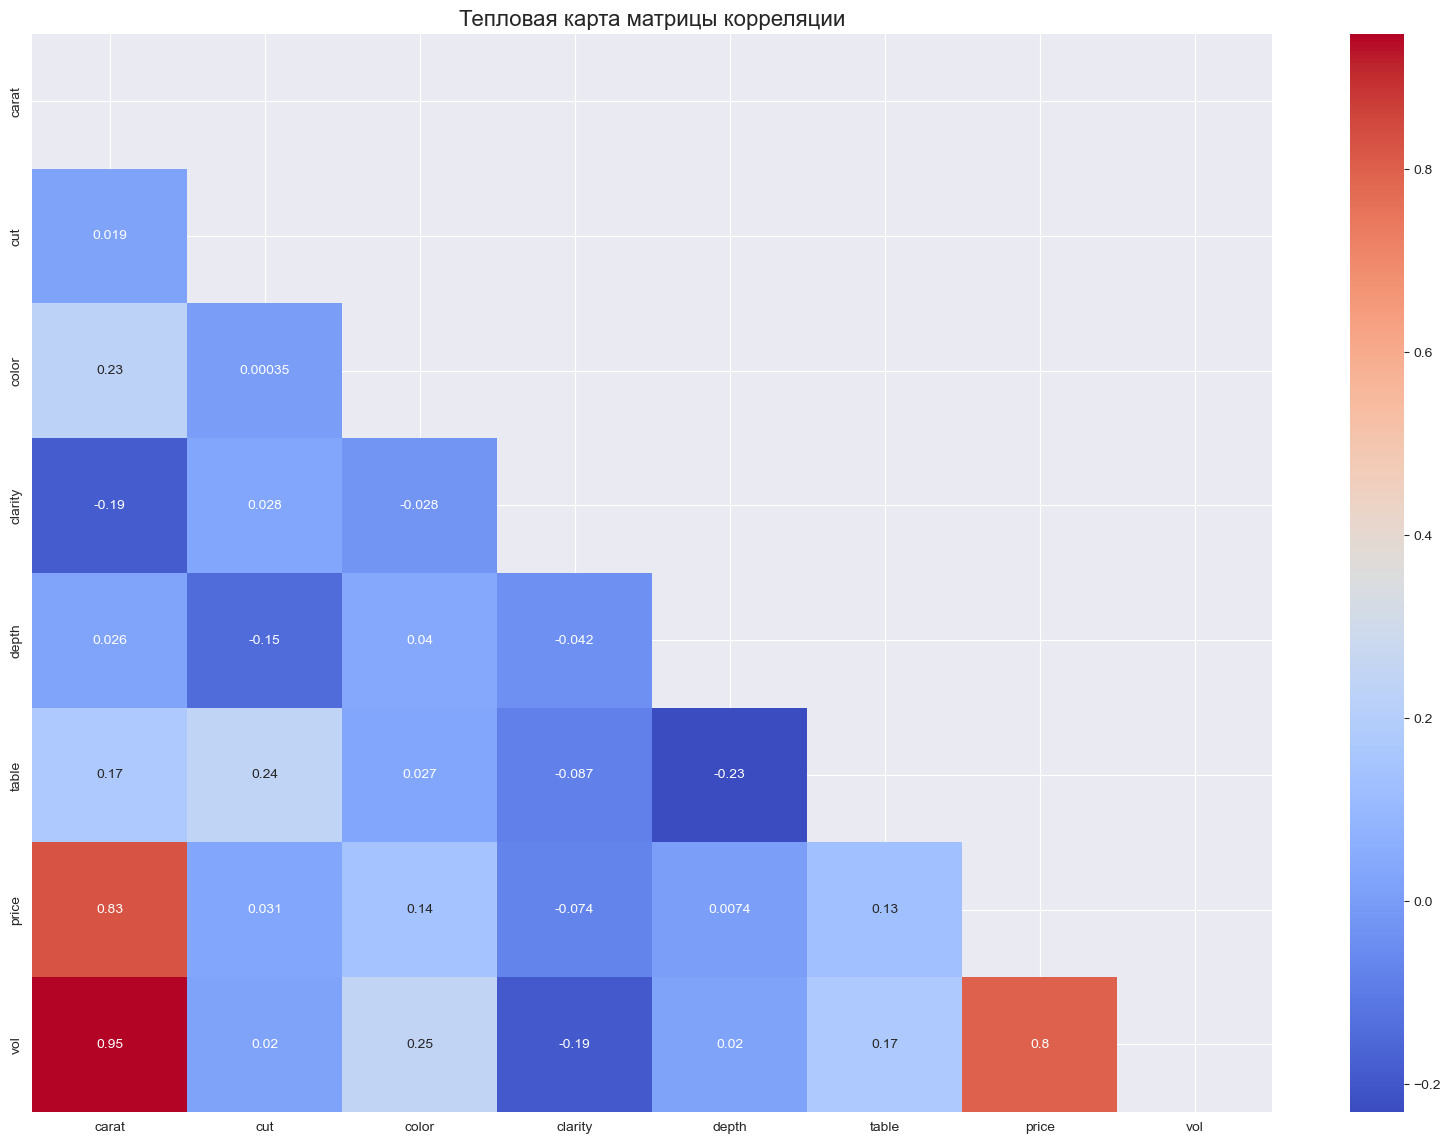

In [29]:
# Посмотрим матрицу корреляции
corr = df.corr()
mask = np.triu(np.ones_like(corr), k=0)

plt.figure(figsize=(20, 14))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Тепловая карта матрицы корреляции', fontsize=16)
plt.show()

In [32]:
# Матрица корреляции показала наличие отдельных признаков с высокой корреляцией.
# Наличие признаков с высоким коэффициентом корреляции (выше 0.7) может привести к проблемам мультиколлинеарности.
# Удалю признаки с высокой корреляцией.
lim_corr_coeff = 0.7  # Задам предельный коэффициент корреляции для удаления признаков
corr_abs = df.corr().abs()
lower = corr_abs.where(np.tril(np.ones(corr_abs.shape), k=-1).astype(bool))
to_drop = [column for column in lower.columns if any(lower[column] >= lim_corr_coeff)]
df.drop(columns=to_drop, inplace=True)

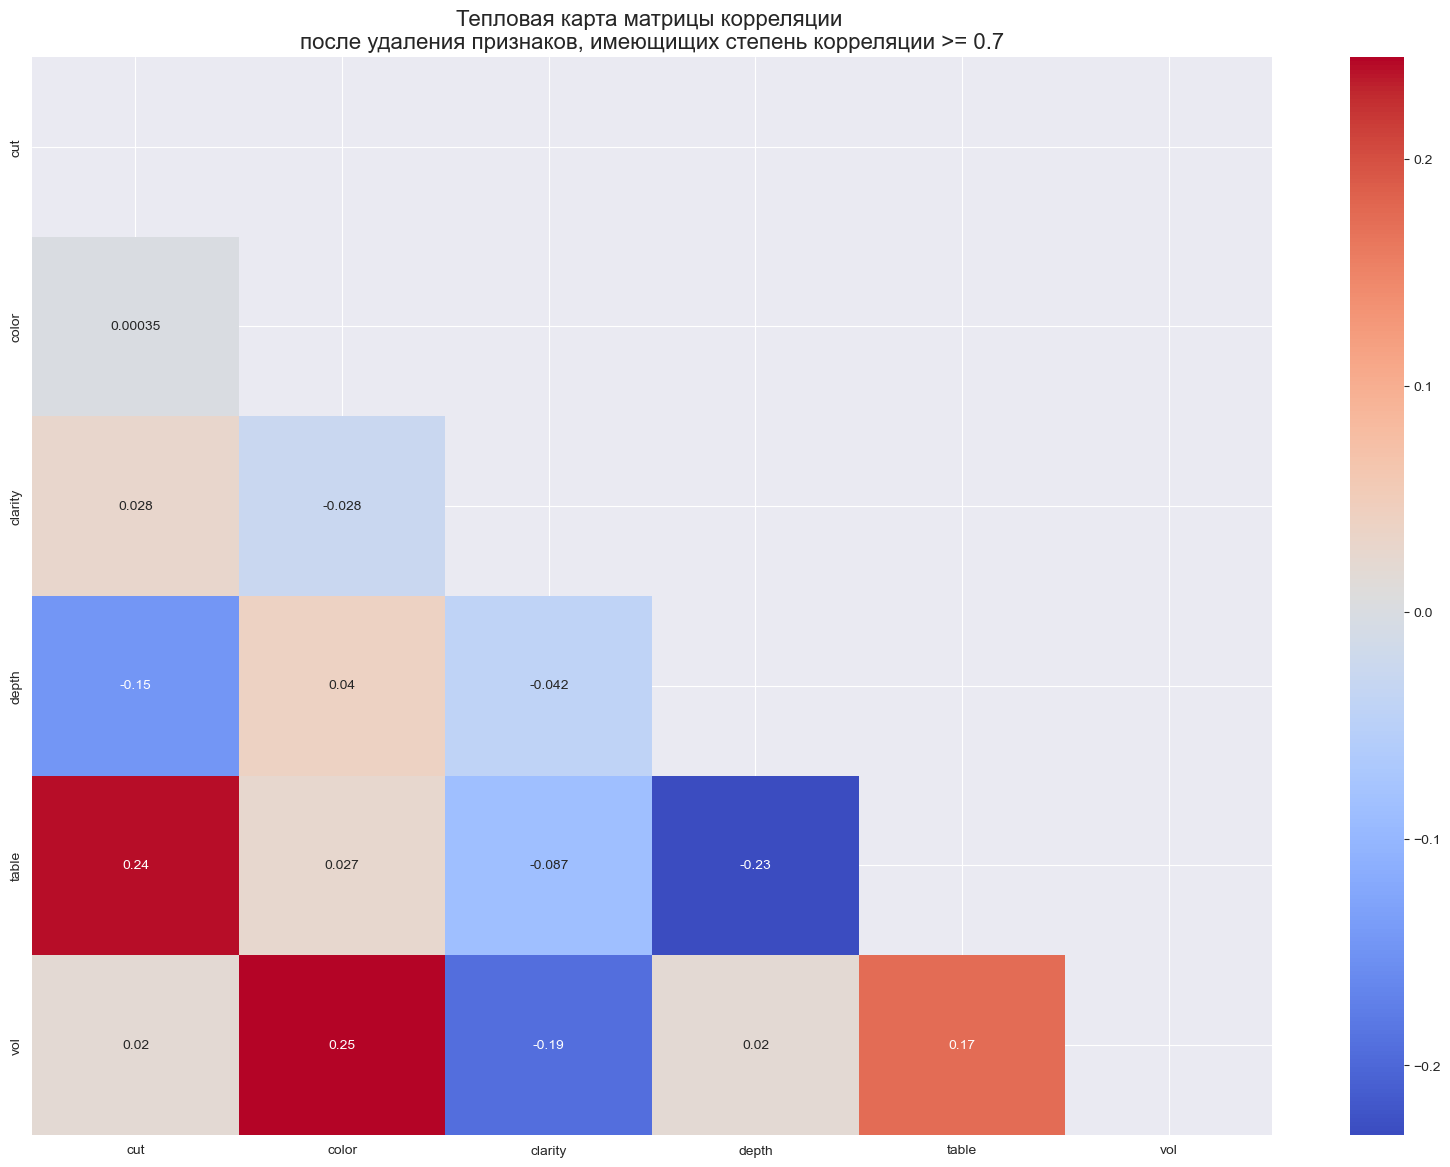

In [33]:
# Повторная проверка матрицы корреляции
corr = df.corr()
mask = np.triu(np.ones_like(corr), k=0)

plt.figure(figsize=(20, 14))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title(
    f'Тепловая карта матрицы корреляции \nпосле удаления признаков, имеющищих степень корреляции >= {lim_corr_coeff}',
    fontsize=16)
plt.show()

In [30]:
# Предобработка завершена. Можно приступать к обучению.

In [31]:


X = df.drop(['price'],1)
y = df['price']



TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given